# Initial look at zillow data set

In [324]:
import pandas as pd
import numpy as np
import sklearn as sk
import pickle
from sklearn import linear_model
from sklearn.preprocessing import Imputer

%matplotlib inline

In [ ]:
df_properties_2016 = pd.read_csv('../data/properties_2016.csv')

In [234]:
df_properties_2017 = pd.read_csv('../data/properties_2017.csv')

In [236]:
df_properties = df_properties_2017

In [237]:
df_properties.head(5)

parcelid  airconditioningtypeid  architecturalstyletypeid  basementsqft  \
0  10754147                    NaN                       NaN           NaN   
1  10759547                    NaN                       NaN           NaN   
2  10843547                    NaN                       NaN           NaN   
3  10859147                    NaN                       NaN           NaN   
4  10879947                    NaN                       NaN           NaN   

   bathroomcnt  bedroomcnt  buildingclasstypeid  buildingqualitytypeid  \
0          0.0         0.0                  NaN                    NaN   
1          0.0         0.0                  NaN                    NaN   
2          0.0         0.0                  5.0                    NaN   
3          0.0         0.0                  3.0                    6.0   
4          0.0         0.0                  4.0                    NaN   

   calculatedbathnbr  decktypeid         ...           numberofstories  \
0                NaN         NaN         ...                       NaN   
1                NaN         NaN         ...                       NaN   
2                NaN         NaN         ...                       1.0   
3                NaN         NaN         ...                       1.0   
4                NaN         NaN         ...                       1.0   

   fireplaceflag  structuretaxvaluedollarcnt  taxvaluedollarcnt  \
0            NaN                         NaN                9.0   
1            NaN                         NaN            27516.0   
2            NaN                    660680.0          1434941.0   
3            NaN                    580059.0          1174475.0   
4            NaN                    196751.0           440101.0   

   assessmentyear  landtaxvaluedollarcnt  taxamount  taxdelinquencyflag  \
0          2016.0                    9.0        NaN                 NaN   
1          2015.0                27516.0        NaN                 NaN   
2          2016.0               774261.0   20800.37                 NaN   
3          2016.0               594416.0   14557.57                 NaN   
4          2016.0               243350.0    5725.17                 NaN   

   taxdelinquencyyear  censustractandblock  
0                 NaN                  NaN  
1                 NaN                  NaN  
2                 NaN                  NaN  
3                 NaN                  NaN  
4                 NaN                  NaN  

[5 rows x 58 columns]

In [238]:
df_transactions_2016 = pd.read_csv('../data/train_2016.csv', parse_dates=[2])
df_transactions_2017 = pd.read_csv('../data/train_2017.csv', parse_dates=[2])

In [241]:
df_transactions = pd.concat((df_transactions_2016, df_transactions_2017), axis = 0)

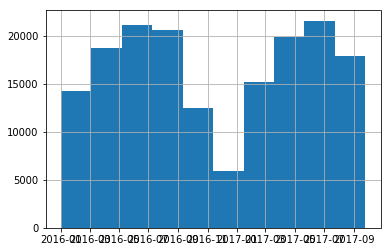

In [242]:
df_transactions.transactiondate.hist()

In [17]:
df_properties.propertycountylandusecode.head()

0    010D
1    0109
2    1200
3    1200
4    1210
Name: propertycountylandusecode, dtype: object

In [16]:
df_properties.dtypes

parcelid                          int64
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                              int64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottuborspa                   object
heatingorsystemtypeid           float64
latitude                          int64


### check duplicates for each parcelID

In [243]:
df_properties.parcelid.unique().shape[0] == df_properties.parcelid.shape[0]

True

In [244]:
# put just treat houses that are sold multiple times as different hosues for simplication purpose
(df_transactions.parcelid.value_counts() > 1).sum() * 1.0 / df_transactions.shape[0]

0.015897503097302965

### merge data

In [330]:
df = pd.merge(left=df_properties, right=df_transactions, on='parcelid')

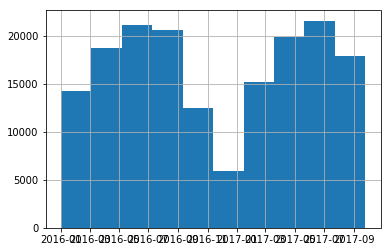

In [246]:
df.transactiondate.hist()
# okay the data should be okay for prototyping a model as it doesn't look biased on time

In [47]:
df.columns

Index([u'parcelid', u'airconditioningtypeid', u'architecturalstyletypeid',
       u'basementsqft', u'bathroomcnt', u'bedroomcnt', u'buildingclasstypeid',
       u'buildingqualitytypeid', u'calculatedbathnbr', u'decktypeid',
       u'finishedfloor1squarefeet', u'calculatedfinishedsquarefeet',
       u'finishedsquarefeet12', u'finishedsquarefeet13',
       u'finishedsquarefeet15', u'finishedsquarefeet50',
       u'finishedsquarefeet6', u'fips', u'fireplacecnt', u'fullbathcnt',
       u'garagecarcnt', u'garagetotalsqft', u'hashottuborspa',
       u'heatingorsystemtypeid', u'latitude', u'longitude',
       u'lotsizesquarefeet', u'poolcnt', u'poolsizesum', u'pooltypeid10',
       u'pooltypeid2', u'pooltypeid7', u'propertycountylandusecode',
       u'propertylandusetypeid', u'propertyzoningdesc',
       u'rawcensustractandblock', u'regionidcity', u'regionidcounty',
       u'regionidneighborhood', u'regionidzip', u'roomcnt', u'storytypeid',
       u'threequarterbathnbr', u'typeconstructiontyp

In [48]:
df.dtypes

parcelid                                 int64
airconditioningtypeid                  float64
architecturalstyletypeid               float64
basementsqft                           float64
bathroomcnt                            float64
bedroomcnt                             float64
buildingclasstypeid                    float64
buildingqualitytypeid                  float64
calculatedbathnbr                      float64
decktypeid                             float64
finishedfloor1squarefeet               float64
calculatedfinishedsquarefeet           float64
finishedsquarefeet12                   float64
finishedsquarefeet13                   float64
finishedsquarefeet15                   float64
finishedsquarefeet50                   float64
finishedsquarefeet6                    float64
fips                                     int64
fireplacecnt                           float64
fullbathcnt                            float64
garagecarcnt                           float64
garagetotalsq

### Define features

In [247]:
all_fields = set(df.columns)
identifiers = set(['transactiondate', 'parcelid'])
label = set(['logerror '])
feat_categorical = set(df.columns[df.dtypes==object])
feat_numeric = all_fields - identifiers - feat_categorical - label

In [8]:
# alternative ways to select all data: 
# select the float columns
# df_num = df.select_dtypes(include=[np.float])
# select non-numeric columns
# df_num = df.select_dtypes(exclude=[np.number])

In [248]:
feat_categorical = list(feat_categorical)
feat_numeric = list(feat_numeric)

In [249]:
# for now, only use numeric features
feat = feat_numeric

In [250]:
feat

['finishedfloor1squarefeet',
 'numberofstories',
 'logerror',
 'regionidcity',
 'finishedsquarefeet6',
 'regionidzip',
 'typeconstructiontypeid',
 'buildingclasstypeid',
 'calculatedbathnbr',
 'fireplacecnt',
 'regionidcounty',
 'pooltypeid10',
 'pooltypeid7',
 'structuretaxvaluedollarcnt',
 'poolsizesum',
 'finishedsquarefeet13',
 'garagetotalsqft',
 'censustractandblock',
 'poolcnt',
 'calculatedfinishedsquarefeet',
 'taxdelinquencyyear',
 'latitude',
 'roomcnt',
 'bedroomcnt',
 'yardbuildingsqft17',
 'basementsqft',
 'taxamount',
 'unitcnt',
 'buildingqualitytypeid',
 'assessmentyear',
 'propertylandusetypeid',
 'threequarterbathnbr',
 'regionidneighborhood',
 'fips',
 'decktypeid',
 'heatingorsystemtypeid',
 'airconditioningtypeid',
 'bathroomcnt',
 'architecturalstyletypeid',
 'garagecarcnt',
 'rawcensustractandblock',
 'fullbathcnt',
 'finishedsquarefeet50',
 'longitude',
 'landtaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'finishedsquarefeet12',
 'storytypeid',
 'yardbuildingsqft26

### convert categorical features

### feature engineering

### impute missing values

In [358]:
# for now, impute everything with -1000
# for f in feat:
#     df.loc[df[f].isnull(), f] = -1000

imp =  Imputer(missing_values=np.nan,
                   strategy="median",
                   axis=0)

### split train-test

In [337]:
mask_train = df.transactiondate < '2017-05-01'
# mask_test_oct = (df.transactiondate >= '2016-10-01') & (df.transactiondate < '2016-11-01')
# mask_test_nov = (df.transactiondate >= '2016-11-01') & (df.transactiondate < '2016-12-01')
# mask_test_dec = (df.transactiondate >= '2016-12-01') & (df.transactiondate < '2017-01-01')
# mask_test = mask_test_oct | mask_test_nov | mask_test_dec
mask_test = (df.transactiondate >= '2017-06-01')

In [362]:
X_train = df.loc[mask_train, feat].astype(float).values
X_test = df.loc[mask_test, feat].astype(float).values

y_train = np.array(df.loc[mask_train, 'logerror'].tolist())
y_test = np.array(df.loc[mask_test, 'logerror'].tolist())

data = (X_train, X_test, y_train, y_test)

In [364]:
X_train = imp.fit_transform(X_train)
X_test = imp.transform(X_test)

In [341]:
# save data
pickle.dump(data, open('../tmp/training_and_testing_data_2017.pkl', 'w'))

### train a simple model

In [366]:
alphas = np.logspace(-5, 1, 5)
enet = linear_model.ElasticNet(l1_ratio=0.7)
train_errors = list()
test_errors = list()
for alpha in alphas:
    print 'fitting enet with alpha={} ..'.format(alpha)
    enet.set_params(alpha=alpha)
    enet.fit(X_train, y_train)
    train_errors.append(enet.score(X_train, y_train))
    test_errors.append(enet.score(X_test, y_test))
    

i_alpha_optim = np.argmax(test_errors)
alpha_optim = alphas[i_alpha_optim]
print("Optimal regularization parameter : %s" % alpha_optim)


fitting enet with alpha=1e-05 ..
fitting enet with alpha=0.000316227766017 ..
fitting enet with alpha=0.01 ..
fitting enet with alpha=0.316227766017 ..
fitting enet with alpha=10.0 ..
Optimal regularization parameter : 1e-05


In [367]:
test_errors

[0.99999971615990368,
 0.9997181713348946,
 0.77204439825672799,
 -0.90334030227054807,
 -0.55500696840416941]

In [368]:
# Estimate the coef_ on full data with optimal regularization parameter
enet.set_params(alpha=alpha_optim)
coef_ = enet.fit( np.concatenate((X_train, X_test), axis=0),np.concatenate((y_train, y_test), axis = 0)).coef_

In [369]:
coef_

array([  0.00000000e+00,  -0.00000000e+00,   9.99635530e-01,
         1.79867474e-12,   8.41575466e-10,  -1.05098144e-10,
        -0.00000000e+00,   0.00000000e+00,  -0.00000000e+00,
         0.00000000e+00,   1.51867387e-09,   0.00000000e+00,
         0.00000000e+00,  -3.04123232e-11,   0.00000000e+00,
        -0.00000000e+00,  -0.00000000e+00,   1.63324011e-19,
         0.00000000e+00,   1.03769633e-09,  -0.00000000e+00,
        -1.95805717e-12,  -0.00000000e+00,  -0.00000000e+00,
        -4.93848069e-09,   1.41314952e-09,  -4.38624639e-10,
        -0.00000000e+00,  -0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,  -2.71582503e-12,
         0.00000000e+00,   0.00000000e+00,  -0.00000000e+00,
        -0.00000000e+00,  -0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   5.51807173e-12,  -0.00000000e+00,
        -3.23768042e-09,   2.25359881e-12,  -2.72425603e-11,
         2.91836845e-11,   3.84585246e-09,   0.00000000e+00,
        -0.00000000e+00,

### visualize

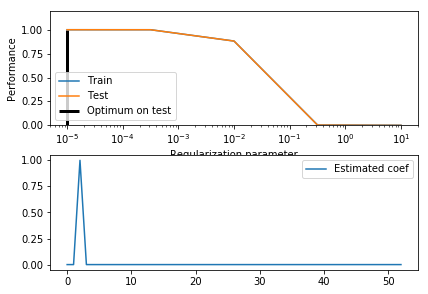

In [257]:
import matplotlib.pyplot as plt
plt.subplot(2, 1, 1)
plt.semilogx(alphas, train_errors, label='Train')
plt.semilogx(alphas, test_errors, label='Test')
plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
           linewidth=3, label='Optimum on test')
plt.legend(loc='lower left')
plt.ylim([0, 1.2])
plt.xlabel('Regularization parameter')
plt.ylabel('Performance')

# Show estimated coef_ vs true coef
plt.subplot(2, 1, 2)
plt.plot(coef_, label='Estimated coef')
plt.legend()
plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.26)
plt.show()

### generate prediction results for submission

In [86]:
df_submission_sample = pd.read_csv('../data/sample_submission.csv')

In [370]:
df_submission_sample.head()

ParcelId  201610  201611  201612  201710  201711  201712
0  10754147       0       0       0       0       0       0
1  10759547       0       0       0       0       0       0
2  10843547       0       0       0       0       0       0
3  10859147       0       0       0       0       0       0
4  10879947       0       0       0       0       0       0

In [371]:
df_pred = df_properties.loc[:, feat]

In [372]:
# note I should not use oct-dec's test data to train the final model. will fix later
# y_pred_oct = enet.predict(df.loc[mask_test_oct, feat].astype(float).values)
# y_pred_nov = enet.predict(df.loc[mask_test_nov, feat].astype(float).values)
# y_pred_dec = enet.predict(df.loc[mask_test_dec, feat].astype(float).values)
y_pred = enet.predict(imp.transform(df_pred.astype(float).values))

In [373]:
np.histogram(y_pred)

(array([      1,       3,       8,      65, 2985118,      14,       3,
              2,       2,       1]),
 array([ 0.00412694,  0.00453625,  0.00494556,  0.00535486,  0.00576417,
         0.00617347,  0.00658278,  0.00699208,  0.00740139,  0.00781069,
         0.00822   ]))

In [374]:
df_bk = df_pred

In [375]:
df_bk.loc[:, '201610'] = y_pred
df_bk.loc[:, '201611'] = y_pred
df_bk.loc[:, '201612'] = y_pred
df_bk.loc[:, '201710'] = y_pred
df_bk.loc[:, '201711'] = y_pred
df_bk.loc[:, '201712'] = y_pred

In [380]:
df_bk = df_bk[['201610','201611','201612','201710','201711','201712']]

In [381]:
df_submission = pd.concat((df_properties[['parcelid']], df_bk), axis = 1)

In [382]:
# del df_submission['parcelid']
df_submission.fillna(0, inplace=True)

In [277]:
# df_submission = pd.merge(
#     left=df_submission_sample[['ParcelId']],
#     right=df_bk,
#     left_on ='ParcelId',
#     right_on='parcelid',
#     how = 'left'
# )

In [383]:
df_submission.head()

parcelid    201610    201611    201612    201710    201711    201712
0  10754147  0.005899  0.005899  0.005899  0.005899  0.005899  0.005899
1  10759547  0.005899  0.005899  0.005899  0.005899  0.005899  0.005899
2  10843547  0.005972  0.005972  0.005972  0.005972  0.005972  0.005972
3  10859147  0.005904  0.005904  0.005904  0.005904  0.005904  0.005904
4  10879947  0.005904  0.005904  0.005904  0.005904  0.005904  0.005904

In [384]:
df_submission.shape[0] == 2985217

True

In [385]:
df_submission.to_csv('../data/submission.csv', header=True, index=False)

## submission requirements:
1. have header
2. no row index
3. Evaluation Exception: Submission must be 2985217 rows
4. fill NAs with 0

### random search

In [ ]:
MODEL = {"enet": sklearn.linear_model.ElasticNet(random_state=42),
         }

# tune the hyperparameters via a randomized search
# params for xgb
elastic_net_params = {
    "max_depth": range(5, 26, 5),
}


# initialize params dict
PARAMS = {
    'xgb': xgb_params,
    'rfc': rfc_params,
    'gbc': gbc_params
}

# define cost function
pr_auc_scorer = make_scorer(average_precision_score)

# define num iters
N_ITER = {
    'enet': 1,
}